In [1]:
# Imports

from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split


In [2]:
# Resize and import mri images
# NOTE : Uses bilinear interpolation here for the compression, may not want that because it's medical
# TODO : Figure out a way to 

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.22, 0.22, 0.22])
])

dataset = datasets.ImageFolder(root = "../data/brain_tumor_dataset", transform=transform)

loader = DataLoader(dataset,
                    batch_size=32,
                    shuffle=True)

In [15]:
# Data setup : (RGB, class)
img, label = dataset[0]
print(img.shape, label)
print(dataset.classes)

torch.Size([3, 224, 224]) 0
['glioma', 'healthy', 'meningioma', 'pituitary']


In [16]:
# DONE : Train/Val/Test split

train_size = int(0.7 * len(dataset))
remaining = len(dataset) - train_size
val_size = int(remaining/2)
test_size = remaining - val_size

print(train_size, val_size, test_size, len(dataset))
train_set, val_set, test_set = random_split(dataset, [train_size, val_size, test_size])

batch_size = 128

train_dl = DataLoader(train_set, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(val_set, batch_size=batch_size, shuffle=True)
test_dl = DataLoader(test_set, batch_size=batch_size, shuffle=True)

4916 1053 1054 7023


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.2727273..2.2727273].


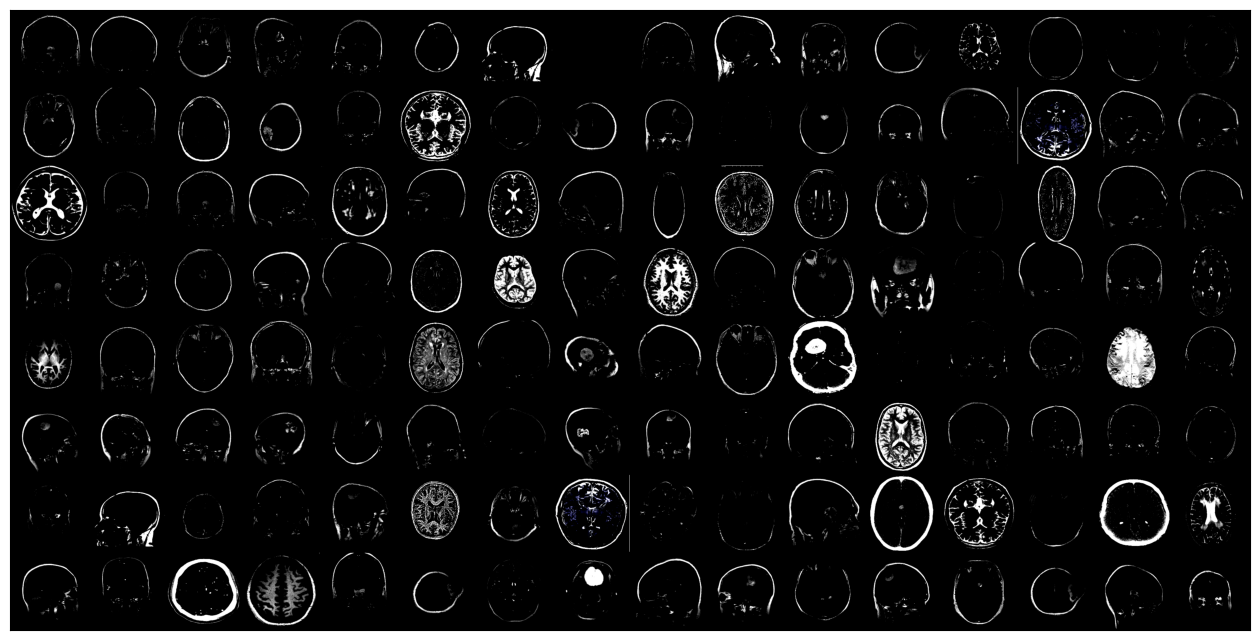

In [18]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def show_batch(dl):
        for images, labels in dl:
                    fig,ax = plt.subplots(figsize = (16,12))
                    ax.set_xticks([])
                    ax.set_yticks([])
                    ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
                    break
        
show_batch(train_dl)

In [ ]:

# TODO : Equalized Histogram
# TODO : Background knolwedge on how imbalanced data is in clinical setting
# TODO : EDA

In [ ]:
# Models : 
# Transfer Learning
# CNN